In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the CSV file to examine its structure
file_path = '/Users/lapiscine/code/CasparRitchie/casparcatchemall/pokemon.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure
df.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
# import pickle

# def preprocess_pokemon_data(df):
#     # Drop unnecessary columns
#     df = df.drop(columns=['japanese_name', 'name'])

#     # Fill missing height and weight with their median
#     df['height_m'] = df['height_m'].fillna(df['height_m'].median())
#     df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].median())

#     # Encode 'classification' using One Hot Encoding
#     ohe_classification = OneHotEncoder()
#     classification_encoded = ohe_classification.fit_transform(df[['classfication']])
#     with open('ohe_classification.pkl', 'wb') as f:
#         pickle.dump(ohe_classification, f)

#     # Correctly handle abilities list
#     df['abilities'] = df['abilities'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
#     mlb_abilities = MultiLabelBinarizer()
#     abilities_encoded = mlb_abilities.fit_transform(df['abilities'])
#     with open('mlb_abilities.pkl', 'wb') as f:
#         pickle.dump(mlb_abilities, f)

#     # Combine and deduplicate 'type1' and 'type2'
#     df['combined_types'] = df[['type1', 'type2']].apply(lambda x: list(set([y for y in x if pd.notna(y)])), axis=1)

#     # One Hot Encoding for combined types
#     mlb_types = MultiLabelBinarizer()
#     types_encoded = mlb_types.fit_transform(df['combined_types'])
#     with open('mlb_types.pkl', 'wb') as f:
#         pickle.dump(mlb_types, f)

#     # Drop the original 'classfication', 'abilities', 'type1', 'type2' columns
#     df = df.drop(columns=['classfication', 'abilities', 'type1', 'type2', 'combined_types'])
#     # Add encoded features back to dataframe
#     classification_encoded_df = pd.DataFrame(classification_encoded.toarray(), columns=ohe_classification.get_feature_names_out())
#     abilities_encoded_df = pd.DataFrame(abilities_encoded, columns=mlb_abilities.classes_)
#     types_encoded_df = pd.DataFrame(types_encoded, columns=mlb_types.classes_)

#     # Concatenate the encoded dataframes with the original dataframe
#     df = pd.concat([df.reset_index(drop=True), classification_encoded_df, abilities_encoded_df, types_encoded_df], axis=1)

#     return df

# # Load the CSV file

# pokemon_df = pd.read_csv(file_path)

# # Preprocess the data
# preprocessed_pokemon_df = preprocess_pokemon_data(pokemon_df)
# preprocessed_pokemon_df


Correlation matrix

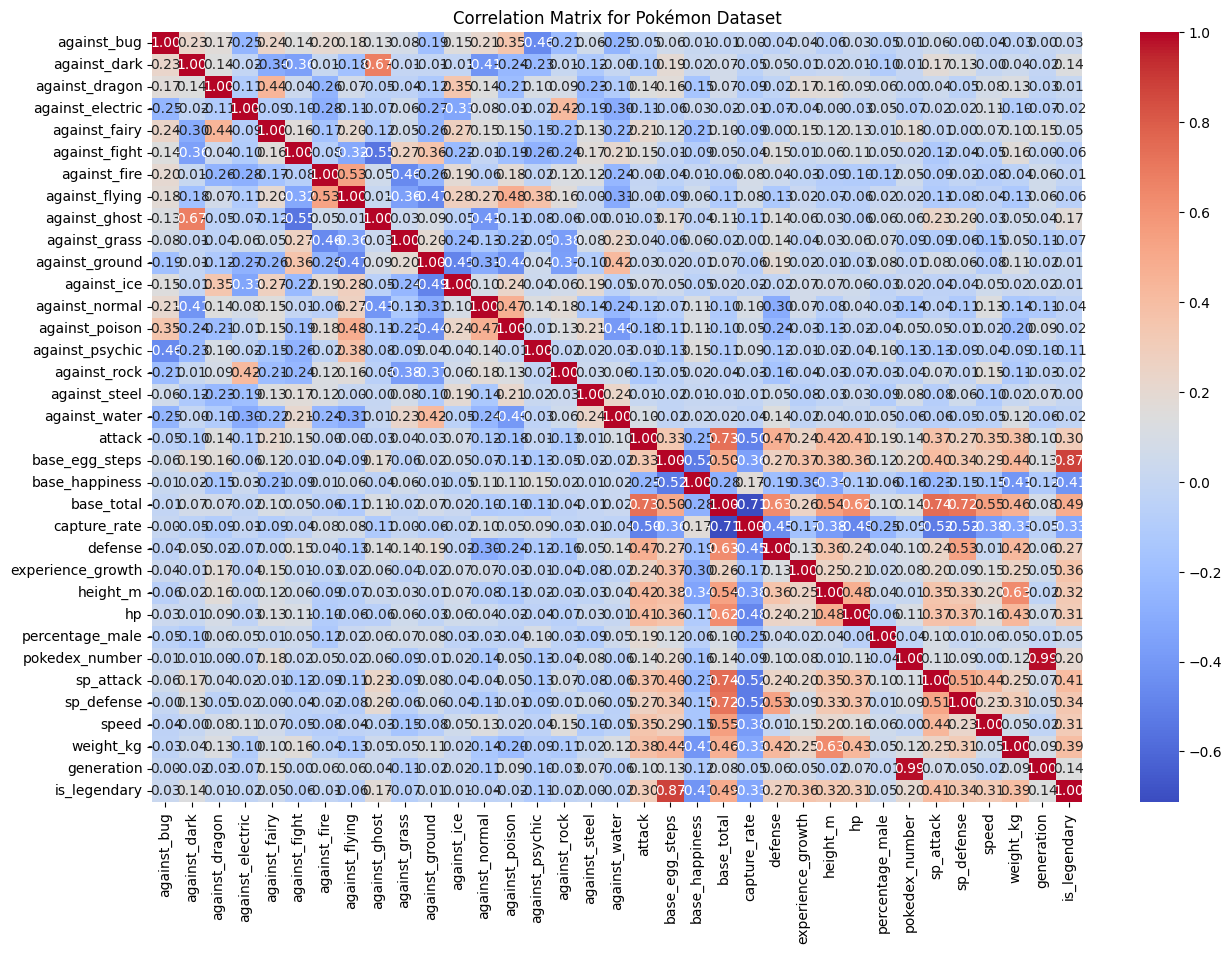

In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculating the correlation matrix for the dataset
# correlation_matrix = df.corr()

# # Setting up the matplotlib figure
# plt.figure(figsize=(15, 10))

# # Drawing a heatmap with the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# plt.title('Correlation Matrix for Pokémon Dataset')
# plt.show()


### columns which are highly correlated to capture_rate
base_total
attack
sp_attack
sp_defense
defense
hp
height_m
speed
weight_kg
is_legendary
base_egg_steps #0.87 corr with is_legendary


1 Feature engineering

Investigate creating new features or transforming existing ones that could be more informative.
Conduct a more detailed feature selection process, possibly using techniques like Recursive Feature Elimination (RFE).


Create some interaction features and apply RFE to select the most important 

In [6]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
# pokemon_df_rfe = pd.read_csv(file_path)# Feature Engineering: Creating new interaction features
# pokemon_df_rfe['attack_defense_ratio'] = pokemon_df_rfe['attack'] / pokemon_df_rfe['defense']
# pokemon_df_rfe['total_stats'] = pokemon_df_rfe[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)
# pokemon_df_rfe['weight_height_ratio'] = pokemon_df_rfe['weight_kg'] / pokemon_df_rfe['height_m']
# # Correctly handle abilities list
# pokemon_df_rfe['abilities'] = pokemon_df_rfe['abilities'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
# mlb_abilities = MultiLabelBinarizer()
# abilities_encoded = mlb_abilities.fit_transform(pokemon_df_rfe['abilities'])
# # Combine and deduplicate 'type1' and 'type2'
# pokemon_df_rfe['combined_types'] = pokemon_df_rfe[['type1', 'type2']].apply(lambda x: list(set([y for y in x if pd.notna(y)])), axis=1)

# # One Hot Encoding for combined types
# mlb_types = MultiLabelBinarizer()
# types_encoded = mlb_types.fit_transform(pokemon_df_rfe['combined_types'])
# # Filling any infinite or NaN values created during feature engineering
# pokemon_df_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)
# pokemon_df_rfe.fillna(pokemon_df_rfe.median(), inplace=True)

#     # Drop the original 'classfication', 'abilities', 'type1', 'type2' columns
# pokemon_df_rfe = pokemon_df_rfe.drop(columns=['classfication', 'abilities', 'type1', 'type2', 'combined_types', 'japanese_name', 'name'])

# # Updating the list of numeric columns after adding new features
# numeric_cols = pokemon_df_rfe.select_dtypes(include=['int64', 'float64']).columns
# numeric_cols = numeric_cols.drop('capture_rate')

# # Re-creating the numeric transformer and preprocessor
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_cols)])

# # Splitting the data into features and target variable
# X = pokemon_df_rfe.drop('capture_rate', axis=1)
# y = pokemon_df_rfe['capture_rate'].apply(pd.to_numeric, errors='coerce')
# y.fillna(y.median(), inplace=True)

# # Applying Recursive Feature Elimination
# linear_reg = LinearRegression()
# rfe = RFECV(estimator=linear_reg, step=1, cv=5, scoring='neg_mean_squared_error')
# X_rfe = preprocessor.fit_transform(X)
# rfe.fit(X_rfe, y)

# # Training a RandomForestRegressor model with selected features
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Selecting the features chosen by RFE
# selected_features = [col for col, selected in zip(X.columns, rfe.support_) if selected]
# X_selected = X[selected_features]

# # Splitting data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# # Training the model
# model.fit(X_train, y_train)

# # Predicting on test set and calculating the mean squared error
# y_pred = model.predict(X_test)
# new_mse = mean_squared_error(y_test, y_pred)

# new_mse
# # OUTPUT 1887.716094375


Hm it doesnt seem much better than before. Let's look at a different way, using some different models

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

def preprocess_pokemon_data(df):

    # Drop unnecessary columns
    df = df.drop(columns=['japanese_name', 'name'])

    # Fill missing values
    df['height_m'] = df['height_m'].fillna(df['height_m'].median())
    df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].median())
    df['type1'].fillna('None', inplace=True)
    df['type2'].fillna('None', inplace=True)
    df['abilities'].fillna('None', inplace=True)
    df['classfication'].fillna('None', inplace=True)


    return df


In [8]:
def encode_features(df):
    """
    Function to encode various features in the Pokemon data.
    """
    # Initialize encoders
    ohe_classification = OneHotEncoder()
    mlb_abilities = MultiLabelBinarizer()
    ohe_type1 = OneHotEncoder()
    ohe_type2 = OneHotEncoder()

    # Perform encoding
    classification_encoded = ohe_classification.fit_transform(df[['classfication']])
    abilities_encoded = mlb_abilities.fit_transform(df['abilities'].apply(lambda x: x.strip("[]").replace("'", "").split(", ")))
    type1_encoded = ohe_type1.fit_transform(df[['type1']])
    type2_encoded = ohe_type2.fit_transform(df[['type2']])

    # Save the fitted encoders using pickle
    with open('ohe_classification.pkl', 'wb') as f:
        pickle.dump(ohe_classification, f)
    with open('mlb_abilities.pkl', 'wb') as f:
        pickle.dump(mlb_abilities, f)
    with open('ohe_type1.pkl', 'wb') as f:
        pickle.dump(ohe_type1, f)
    with open('ohe_type2.pkl', 'wb') as f:
        pickle.dump(ohe_type2, f)

    # Create DataFrames for encoded features
    classification_encoded_df = pd.DataFrame(classification_encoded.toarray(), columns=ohe_classification.get_feature_names_out())
    abilities_encoded_df = pd.DataFrame(abilities_encoded, columns=mlb_abilities.classes_)
    type1_encoded_df = pd.DataFrame(type1_encoded.toarray(), columns=ohe_type1.get_feature_names_out(['type1']))
    type2_encoded_df = pd.DataFrame(type2_encoded.toarray(), columns=ohe_type2.get_feature_names_out(['type2']))

    # Combine encoded features with the original dataframe
    df = pd.concat([df, classification_encoded_df, abilities_encoded_df, type1_encoded_df, type2_encoded_df], axis=1)

    # Drop the original columns that were encoded
    df = df.drop(columns=['classfication', 'abilities', 'type1', 'type2', 'percentage_male'])

    return df


# Load the CSV file
pokemon_df = pd.read_csv(file_path)

# Preprocess the data
preprocessed_pokemon_df = preprocess_pokemon_data(pokemon_df)

# Encode features
encoded_pokemon_df = encode_features(preprocessed_pokemon_df)

# Display the encoded dataframe
encoded_pokemon_df.head()


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model Selection

In [9]:
# X = encoded_pokemon_df.drop('capture_rate', axis=1)
# y = encoded_pokemon_df['capture_rate']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# # Define models and their parameter grids for regression
# models_param_grid = {
#     RandomForestRegressor(random_state=42): {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [10, 20, 30],
#         'min_samples_split': [2, 5, 10]
#     },
#     XGBRegressor(random_state=42): {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'max_depth': [3, 5, 7]
#     }
# }

# # Randomized Search
# best_models = {}
# for model, param_grid in models_param_grid.items():
#     random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
#     random_search.fit(X_train, y_train)
#     best_models[model.__class__.__name__] = random_search.best_estimator_

# # Evaluate the models
# for model_name, model in best_models.items():
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     print(f"Mean Squared Error for {model_name}: {mse:.2f}")
# # OUTPUT
# # Fitting 5 folds for each of 10 candidates, totalling 50 fits
# # Fitting 5 folds for each of 10 candidates, totalling 50 fits
# # Mean Squared Error for RandomForestRegressor: 1419.58
# # Mean Squared Error for XGBRegressor: 1574.71


In [11]:
# # Check data types of all columns
# print(X_train.dtypes)

# # Identify non-numeric columns
# non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns
# print("Non-numeric columns:", non_numeric_columns)

# # If there are non-numeric columns, consider converting them to numeric or dropping them
# # For example, to drop:
# # X_train = X_train.drop(non_numeric_columns, axis=1)
# # X_test = X_test.drop(non_numeric_columns, axis=1)

# # Check for missing values
# print("Missing values in X_train:", X_train.isnull().sum().sum())

# # Fill missing values or drop rows/columns with missing values
# # For example, to fill with median:
# # X_train = X_train.fillna(X_train.median())
# # X_test = X_test.fillna(X_test.median())

# # Reattempt the RandomizedSearchCV with the modified data


In [12]:
# # Check for missing values in each column in the training set
# missing_values_train = X_train.isnull().sum()
# print("Missing values in X_train:")
# print(missing_values_train[missing_values_train > 0])  # Display only columns with missing values

# # Similarly, for the testing set
# missing_values_test = X_test.isnull().sum()
# print("\nMissing values in X_test:")
# print(missing_values_test[missing_values_test > 0])  # Display only columns with missing values
# # OUTPUT
# # Missing values in X_train:
# # Series([], dtype: int64)

# # Missing values in X_test:
# # Series([], dtype: int64)


Hyperparameter tuning

In [13]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the parameter grid based on the results of RandomizedSearchCV
# param_grid = {
#     'n_estimators': [150, 200, 250],  # Narrow down around the best found in RandomizedSearchCV
#     'max_depth': [15, 20, 25],        # Narrow down around the best found in RandomizedSearchCV
#     'min_samples_split': [3, 4, 5]    # Narrow down around the best found in RandomizedSearchCV
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit the model on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score (MSE) from GridSearchCV: ", grid_search.best_score_)

# # Evaluate on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set: ", mse)
# # OUTPUT
# # Best parameters found:  {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 250}
# # Best score (MSE) from GridSearchCV:  0.678780602243106
# # Mean Squared Error on Test Set:  1426.991357061649


Best parameters found:  {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 250}
Best score (MSE) from GridSearchCV:  0.678780602243106
Mean Squared Error on Test Set:  1426.991357061649

Cross-Validation

Stacking some models

In [14]:
# from sklearn.ensemble import StackingRegressor, RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression

# # Define base models
# base_models = [
#     ('random_forest', RandomForestRegressor(n_estimators=2500, max_depth=25, min_samples_split=5, random_state=42)),
#     ('knn', KNeighborsRegressor(n_neighbors=5))
# ]

# # Define final estimator
# final_estimator = LinearRegression()

# # Create the Stacking Regressor
# stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=final_estimator, n_jobs=-1)

# # Fit the stacked model
# stacked_regressor.fit(X_train, y_train)

# # Evaluate the stacked model
# y_pred = stacked_regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error for Stacked Model: ", mse)
# # OUTPUT
# # Mean Squared Error for Stacked Model:  1401.0486911916155


In [15]:
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Assume rf_best and xgb_best are your tuned RandomForestRegressor and XGBRegressor
# rf_best = RandomForestRegressor(n_estimators=250, max_depth=25, min_samples_split=5, random_state=42)
# xgb_best = XGBRegressor(n_estimators=250, max_depth=25, learning_rate=0.05, random_state=42)

# # Train the models
# rf_best.fit(X_train, y_train)
# xgb_best.fit(X_train, y_train)

# # Make predictions
# rf_predictions = rf_best.predict(X_test)
# xgb_predictions = xgb_best.predict(X_test)

# # Average the predictions
# average_predictions = (rf_predictions + xgb_predictions) / 2

# # Evaluate the ensemble
# mse = mean_squared_error(y_test, average_predictions)
# print("Mean Squared Error for Averaging Ensemble: ", mse)
# # OUTPUT
# # Mean Squared Error for Averaging Ensemble:  1502.0843498702257


In [16]:


X = encoded_pokemon_df.drop('capture_rate', axis=1)
y = encoded_pokemon_df['capture_rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define base models for stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=250, max_depth=25, min_samples_split=5, random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR()),  # Support Vector Regressor
    ('knn', KNeighborsRegressor())  # K-Neighbors Regressor
]

# Initialize Stacking Regressor with a meta-regressor
stack_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=1.0))

# Fit the model
stack_reg.fit(X_train, y_train)

# Make predictions and evaluate
predictions = stack_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Evaluation Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Evaluation Metrics:
Mean Squared Error: 1470.9406802204612
Mean Absolute Error: 26.343420934361188
R-squared Score: 0.751598434078464


Data preprocessing adjustments

? investigate scaling

Mondel interpretation (SHAP)

NOW FOR PREDICT

In [17]:
# Load the new CSV file containing fake Pokémon data
fake_pokemon_file_path = '/Users/lapiscine/code/mtthibault/catchemall/notebooks/pokemon-prediction-added-fake-pokemons.csv'
fake_pokemon_df = pd.read_csv(fake_pokemon_file_path, sep=";")

# Displaying the first few rows of the dataframe to understand its structure
fake_pokemon_df.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,NaN,99991,194.0,230.0,180.0,grass,water,999.9,7.0,1.0
1,"['Swift Swim', 'Sniper', 'Damp']",0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,NaN,99992,10.0,20.0,5.0,NaN,NaN,0.1,NaN,0.0
2,"['Thick Fat', 'Hydration', 'Ice Body']",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,99993,102.0,125.0,97.0,NaN,NaN,500.0,NaN,0.0
3,"['Early Bird', 'Flash Fire', 'Unnerve']",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,NaN,99994,102.0,125.0,97.0,NaN,NaN,500.0,NaN,1.0
4,"['Hustle', 'Scrappy', 'Moody']",0.50,1.00,2.00,0.25,0.50,1.00,2.00,0.25,1.00,...,NaN,99995,10.0,100.0,10.0,NaN,NaN,10.0,NaN,0.0


In [18]:
# Preprocess the new data
preprocessed_fake_pokemon_df = preprocess_pokemon_data(fake_pokemon_df)

# Encode the new data using the same encoders
encoded_fake_pokemon_df = encode_features(preprocessed_fake_pokemon_df)

# Ensure the new data has the same columns as the training data, in the same order
missing_cols = set(X_train.columns) - set(encoded_fake_pokemon_df.columns)
missing_df = pd.DataFrame(0, index=np.arange(len(encoded_fake_pokemon_df)), columns=missing_cols)
encoded_fake_pokemon_df = pd.concat([encoded_fake_pokemon_df, missing_df], axis=1)
encoded_fake_pokemon_df = encoded_fake_pokemon_df[X_train.columns]

# Ensure there are no NaN values in the data
encoded_fake_pokemon_df.fillna(0, inplace=True)

# Predict using the stacked model
fake_pokemon_predictions = stack_reg.predict(encoded_fake_pokemon_df)

# Display the predictions
print(fake_pokemon_predictions)


[ 42.58324273 173.61611786  46.81260708  39.551687    53.63188338
  54.59397065 157.3269369  157.32693719]


Create a way of the user entering the 10 key attribute scores and for the others to be randomly generated

In [36]:
def predict_catchability(base_total, attack, sp_attack, sp_defense, defense, hp, height_m, speed, weight_kg, is_legendary, base_egg_steps, model, original_df):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'base_total': [base_total],
        'attack': [attack],
        'sp_attack': [sp_attack],
        'sp_defense': [sp_defense],
        'defense': [defense],
        'hp': [hp],
        'height_m': [height_m],
        'speed': [speed],
        'weight_kg': [weight_kg],
        'is_legendary': [is_legendary],
        'base_egg_steps': [base_egg_steps]
    })

    # Generate random values for other attributes in a separate DataFrame
    random_data = pd.DataFrame({column: np.random.choice(original_df[column].dropna().values, size=1)
                                for column in original_df.columns if column not in input_data.columns})

    # Combine the input and random data
    input_data = pd.concat([input_data, random_data], axis=1)

    # Ensure the input data has the same column order as the training data
    input_data = input_data.reindex(columns=[col for col in original_df.columns if col != 'capture_rate'])

    # Apply the prediction model
    prediction = model.predict(input_data)

    return prediction[0]

# Example usage
model = stack_reg  # Your trained model
original_df = encoded_pokemon_df  # Original DataFrame

# Example input values
base_total = 10  # Example value
attack = 10       # Example value
sp_attack = 10    # Example value
sp_defense = 10    # Example value
defense = 10    # Example value
hp = 10    # Example value
height_m = 0.1    # Example value
speed = 10    # Example value
weight_kg = 1.0    # Example value
is_legendary = 0    # Example value
base_egg_steps = 20    # Example value

# Predict
catchability = predict_catchability(base_total,
                                    attack,
                                    sp_attack,
                                    sp_defense,
                                    defense,
                                    hp,
                                    height_m,
                                    speed,
                                    weight_kg,
                                    is_legendary,
                                    base_egg_steps,
                                    model,
                                    original_df)
print(f"Predicted Catchability: {catchability}")


Predicted Catchability: 212.12364129397542
